# DA - NCAA - Exploration of data
In this playground, we are going to explore all the historical data and clean the data.

In [1]:
# package requirement: numpy, pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
teams_df = pd.read_csv('dataset/Teams.csv')
rgc_85_16 = pd.read_csv('dataset/RegularSeasonCompactResults.csv')
rgd_85_16 = pd.read_csv('dataset/RegularSeasonDetailedResults.csv')
rgc_17 = pd.read_csv('dataset/2017_Final_CompactResults.csv')
rgd_17 = pd.read_csv('dataset/2017_Final_DetailedResults.csv')

rgc = pd.concat([rgc_85_16, rgc_17])
print(rgc)

      Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot
0       1985      20   1228      81   1328      64    N      0
1       1985      25   1106      77   1354      70    H      0
2       1985      25   1112      63   1223      56    H      0
3       1985      25   1165      70   1432      54    H      0
4       1985      25   1192      86   1447      74    H      0
5       1985      25   1218      79   1337      78    H      0
6       1985      25   1228      64   1226      44    N      0
7       1985      25   1242      58   1268      56    N      0
8       1985      25   1260      98   1133      80    H      0
9       1985      25   1305      97   1424      89    H      0
10      1985      25   1307     103   1288      71    H      0
11      1985      25   1344      75   1438      71    N      0
12      1985      25   1374      91   1411      72    H      0
13      1985      25   1412      70   1397      65    N      0
14      1985      25   1417      87   1225      58    H

In [3]:
rgd = pd.concat([rgd_85_16, rgd_17])
print(rgd)

      Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot  Wfgm  Wfga  \
0       2003      10   1104      68   1328      62    N      0    27    58   
1       2003      10   1272      70   1393      63    N      0    26    62   
2       2003      11   1266      73   1437      61    N      0    24    58   
3       2003      11   1296      56   1457      50    N      0    18    38   
4       2003      11   1400      77   1208      71    N      0    30    61   
5       2003      11   1458      81   1186      55    H      0    26    57   
6       2003      12   1161      80   1236      62    H      0    23    55   
7       2003      12   1186      75   1457      61    N      0    28    62   
8       2003      12   1194      71   1156      66    N      0    28    58   
9       2003      12   1458      84   1296      56    H      0    32    67   
10      2003      13   1166     106   1426      50    H      0    41    69   
11      2003      13   1202      74   1106      73    N      0  

## Check missing value

In [4]:
for d in rgd:
    print(d + ": " + str(rgd[d].isnull().values.any()))

Season: False
Daynum: False
Wteam: False
Wscore: False
Lteam: False
Lscore: False
Wloc: False
Numot: False
Wfgm: False
Wfga: False
Wfgm3: False
Wfga3: False
Wftm: False
Wfta: False
Wor: False
Wdr: False
Wast: False
Wto: False
Wstl: False
Wblk: False
Wpf: False
Lfgm: False
Lfga: False
Lfgm3: False
Lfga3: False
Lftm: False
Lfta: False
Lor: False
Ldr: False
Last: False
Lto: False
Lstl: False
Lblk: False
Lpf: False


In [5]:
rgd_w = rgd[['Season','Wteam','Wscore','Wloc','Numot','Wfgm','Wfga','Wfgm3','Wfga3','Wftm','Wfta',
             'Wor','Wdr','Wast','Wto','Wstl','Wblk','Wpf']]
rgd_l = rgd[['Season','Lteam','Lscore','Wloc','Numot','Lfgm','Lfga','Lfgm3','Lfga3','Lftm','Lfta',
             'Lor','Ldr','Last','Lto','Lstl','Lblk','Lpf']]

rgd_w.columns = ['Season','Team','Score','Loc','Numot','Fgm','Fga','Fgm3','Fga3','Ftm','Fta',
                 'Or','Dr','Ast','To','Stl','Blk','Pf']
rgd_l.columns = ['Season','Team','Score','Loc','Numot','Fgm','Fga','Fgm3','Fga3','Ftm','Fta',
                 'Or','Dr','Ast','To','Stl','Blk','Pf']
rgd_w['Result'] = pd.Series(np.ones(rgd_w.shape[0]))
rgd_l['Result'] = pd.Series(np.zeros(rgd_w.shape[0]))
rgdx = pd.concat([rgd_w,rgd_l])

/Users/cyy/env/ds/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cyy/env/ds/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(0, 1)

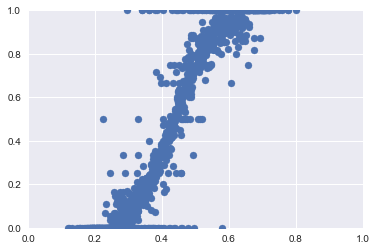

In [6]:
rgdx['FgR'] = rgdx.Fgm / rgdx.Fga
rgdx['Fg3R'] = rgdx.Fgm3 / rgdx.Fga3
rgdx['FtR'] = rgdx.Ftm / rgdx.Fta
rgdx['Rb'] = rgdx.Or + rgdx.Dr

#rgdx.groupby(['FgR'])['Result'].sum() / rgdx.groupby(['FgR'])['Result'].count()
t = rgdx.groupby(['FgR'])['Result'].sum() / rgdx.groupby(['FgR']).size()
plt.scatter(t.index, t.values)
plt.xlim(0,1)
plt.ylim(0,1)

In [17]:
rgdx.head()

,Season,Team,Score,Loc,Numot,Fgm,Fga,Fgm3,Fga3,Ftm,...,Ast,To,Stl,Blk,Pf,Result,FgR,Fg3R,FtR,Rb
0,2003,1104,68,N,0,27,58,3,14,11,...,13,23,7,1,22,1.0,0.465517,0.214286,0.611111,38
1,2003,1272,70,N,0,26,62,8,20,10,...,16,13,4,4,18,1.0,0.419355,0.400000,0.526316,43
2,2003,1266,73,N,0,24,58,8,18,17,...,15,10,5,2,25,1.0,0.413793,0.444444,0.586207,43
3,2003,1296,56,N,0,18,38,3,9,17,...,11,12,14,2,18,1.0,0.473684,0.333333,0.548387,25
4,2003,1400,77,N,0,30,61,6,14,11,...,12,14,4,4,20,1.0,0.491803,0.428571,0.846154,39


In [26]:
t = rgdx[rgdx['Season'] == 2013].groupby('FgR')['Result'].sum() 
rgdx.loc[rgdx['Season'] == 2013 and rgdx['Team'] == 1104]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# under construction
rg_all_plain_eff_df = pd.DataFrame(rgdx.groupby(['Season','Team'])['Result'].sum() / 
                                   rgdx.groupby(['Season','Team'])['Result'].count())

rg_all_plain_eff_df['Fgr'] = rg_all_plain_df.groupby(['Season','Team'])['Fgm'].sum() / rg_all_plain_df.groupby(['Season','Team'])['Fga'].sum()
rg_all_plain_eff_df['Ftr'] = rg_all_plain_df.groupby(['Season','Team'])['Ftm'].sum() / rg_all_plain_df.groupby(['Season','Team'])['Fta'].sum()
rg_all_plain_eff_df['Fg3r'] = rg_all_plain_df.groupby(['Season','Team'])['Fgm3'].sum() / rg_all_plain_df.groupby(['Season','Team'])['Fga3'].sum()
rg_all_plain_eff_df['Rbr'] = (rg_all_plain_df.groupby(['Season','Team'])['Or'].sum() +  rg_all_plain_df.groupby(['Season','Team'])['Dr'].sum())/ rg_all_plain_df.groupby(['Season','Team'])['Result'].count()
rg_all_plain_eff_df['Astr'] = rg_all_plain_df.groupby(['Season','Team'])['Ast'].sum() / rg_all_plain_df.groupby(['Season','Team'])['Result'].count()
rg_all_plain_eff_df['Tor'] = rg_all_plain_df.groupby(['Season','Team'])['To'].sum() / rg_all_plain_df.groupby(['Season','Team'])['Result'].count()
rg_all_plain_eff_df['Stlr'] = rg_all_plain_df.groupby(['Season','Team'])['Stl'].sum() / rg_all_plain_df.groupby(['Season','Team'])['Result'].count()
rg_all_plain_eff_df['Blkr'] = rg_all_plain_df.groupby(['Season','Team'])['Blk'].sum() / rg_all_plain_df.groupby(['Season','Team'])['Result'].count()
rg_all_plain_eff_df['Pfr'] = rg_all_plain_df.groupby(['Season','Team'])['Pf'].sum() / rg_all_plain_df.groupby(['Season','Team'])['Result'].count()

#rg_all_plain_eff_df.iloc[rg_all_plain_eff_df.index.get_level_values(0) == 2013]
#plt.scatter(rg_all_plain_eff_df.iloc[rg_all_plain_eff_df.index.get_level_values(0) == 2013].Fgr, rg_all_plain_eff_df.iloc[rg_all_plain_eff_df.index.get_level_values(0) == 2013].Result)
plt.scatter(rg_all_plain_eff_df.Fgr, rg_all_plain_eff_df.Result, )
plt.xlim(0,1)
z = np.polyfit(rg_all_plain_eff_df.Fgr, rg_all_plain_eff_df.Result, 3)
f = np.poly1d(z)
x_new = np.linspace(rg_all_plain_eff_df.Fgr.min(), rg_all_plain_eff_df.Fgr.max(), 10000)
y_new = f(x_new)
plt.plot(x_new, y_new,'r')

#rg_all_plain_df.groupby(['Team'])['Result'].sum().max()

